In [13]:
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

       	['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

       	['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

       	['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

      ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

In [14]:
import collections
import matplotlib.pyplot as plt

all_data=[]
costumers=[]
for i,data in enumerate(dataset):
    all_data+=data
    for j in range(len(data)):
        costumers.append(i+1)
freq=collections.Counter(all_data)
print(freq)
plt.bar(range(len(freq)), list(freq.values()), align='center')
plt.xticks(range(len(freq)), list(freq.keys()),rotation=45)
plt.show()

Counter({'Skirt': 4, 'Scarf': 4, 'Pants': 4, 'Hat': 4, 'Sneakers': 2, 'Dress': 2, 'Heels': 2, 'Earrings': 2, 'Sunglasses': 1, 'Sandals': 1, 'Necklace': 1, 'Shirt': 1})


<Figure size 640x480 with 1 Axes>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

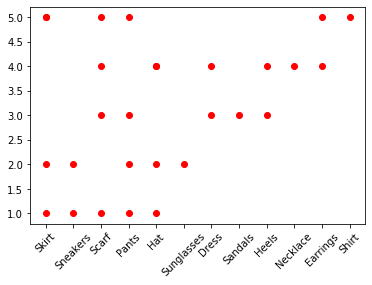

In [15]:
plt.scatter(all_data,costumers,color='red')
plt.xticks(rotation=45)

In [16]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)
data=pd.DataFrame(te_ary,columns=te.columns_)
data

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [17]:
from mlxtend.frequent_patterns import apriori

apriori_results=apriori(data,min_support=0.6,use_colnames=True)
apriori(data,min_support=0.6,use_colnames=True)

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Pants, Scarf)"
5,0.6,"(Pants, Skirt)"


In [18]:
from mlxtend.frequent_patterns import association_rules

association_rules(apriori_results, metric="confidence", min_threshold=0.7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6
3,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf


In [19]:
new_data=pd.read_csv(filepath_or_buffer=r'C:\Users\pc\Downloads\Market_Basket_Optimisation.csv',header=None)
new_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
0     7501 non-null object
1     5747 non-null object
2     4389 non-null object
3     3345 non-null object
4     2529 non-null object
5     1864 non-null object
6     1369 non-null object
7     981 non-null object
8     654 non-null object
9     395 non-null object
10    256 non-null object
11    154 non-null object
12    87 non-null object
13    47 non-null object
14    25 non-null object
15    8 non-null object
16    4 non-null object
17    4 non-null object
18    3 non-null object
19    1 non-null object
dtypes: object(20)
memory usage: 1.1+ MB


In [21]:
import numpy as np
import math
new_dataset=[]
for i,items in new_data.iterrows():
    costumer=[]
    for item in items:
        if isinstance(item, str):
            costumer.append(item)
        else:
            break
    new_dataset.append(costumer)

In [22]:
print(new_dataset)

[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'], ['low fat yogurt'], ['whole wheat pasta', 'french fries'], ['soup', 'light cream', 'shallot'], ['frozen vegetables', 'spaghetti', 'green tea'], ['french fries'], ['eggs', 'pet food'], ['cookies'], ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'], ['spaghetti', 'champagne', 'cookies'], ['mineral water', 'salmon'], ['mineral water'], ['shrimp', 'chocolate', 'chicken', 'honey', 'oil', 'cooking oil', 'low fat yogurt'], ['turkey', 'eggs'], ['turkey', 'fresh tuna', 'tomatoes', 'spaghetti', 'mineral water', 'black tea', 'salmon', 'eggs', 'chicken', 'extra d

In [23]:
new_dataset=[items for items in new_dataset if len(items)!= 1]
len(new_dataset)

5747

Counter({'mineral water': 1695, 'eggs': 1258, 'spaghetti': 1254, 'chocolate': 1157, 'french fries': 1150, 'milk': 939, 'green tea': 919, 'ground beef': 716, 'frozen vegetables': 696, 'pancakes': 674, 'burgers': 634, 'cake': 579, 'low fat yogurt': 529, 'shrimp': 522, 'tomatoes': 494, 'escalope': 494, 'olive oil': 471, 'turkey': 456, 'frozen smoothie': 455, 'chicken': 440, 'whole wheat rice': 421, 'cookies': 380, 'cooking oil': 376, 'grated cheese': 372, 'soup': 371, 'honey': 350, 'herb & pepper': 350, 'fresh bread': 311, 'salmon': 308, 'champagne': 306, 'avocado': 243, 'brownies': 235, 'cottage cheese': 229, 'hot dogs': 223, 'tomato juice': 218, 'butter': 218, 'whole wheat pasta': 214, 'red wine': 201, 'ham': 200, 'light mayo': 195, 'pepper': 194, 'cereals': 189, 'energy drink': 183, 'energy bar': 181, 'vegetables mix': 180, 'yogurt cake': 180, 'french wine': 167, 'fresh tuna': 162, 'oil': 161, 'muffins': 154, 'almonds': 151, 'meatballs': 151, 'parmesan cheese': 146, 'strawberries': 146

c:\python3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


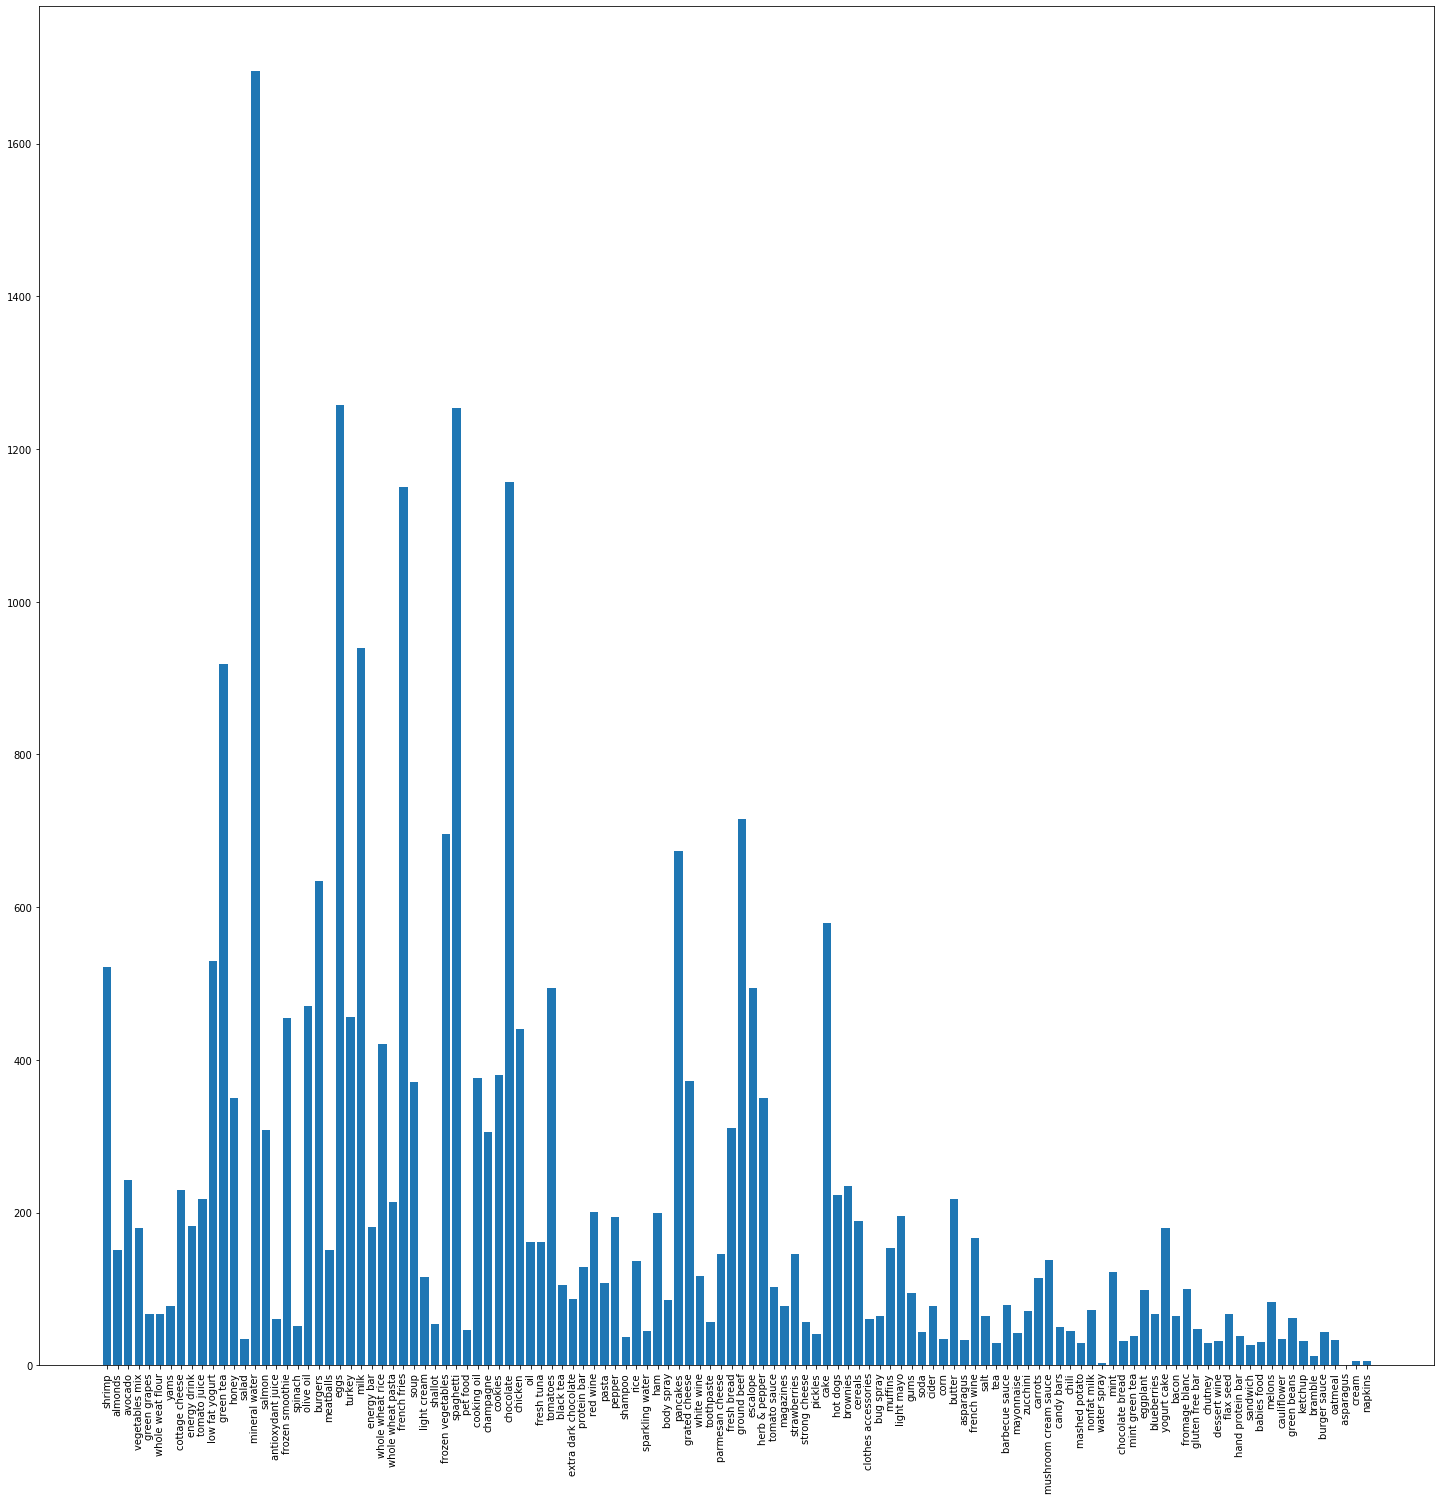

In [24]:
all_data=[]
costumers=[]
for i,data in enumerate(new_dataset):
    all_data+=data
    for j in range(len(data)):
        costumers.append(i+1)
freq=collections.Counter(all_data)
print(freq)
fig=plt.figure(figsize=(25,25))
plt.bar(range(len(freq)), list(freq.values()), align='center')
plt.xticks(range(len(freq)), list(freq.keys()),rotation=90)
fig.show()

The best sellers were mineral water, eggs, spaghetti , french fries, chocolate , green tea and milk.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119],
 <a list of 120 Text xticklabel objects>)

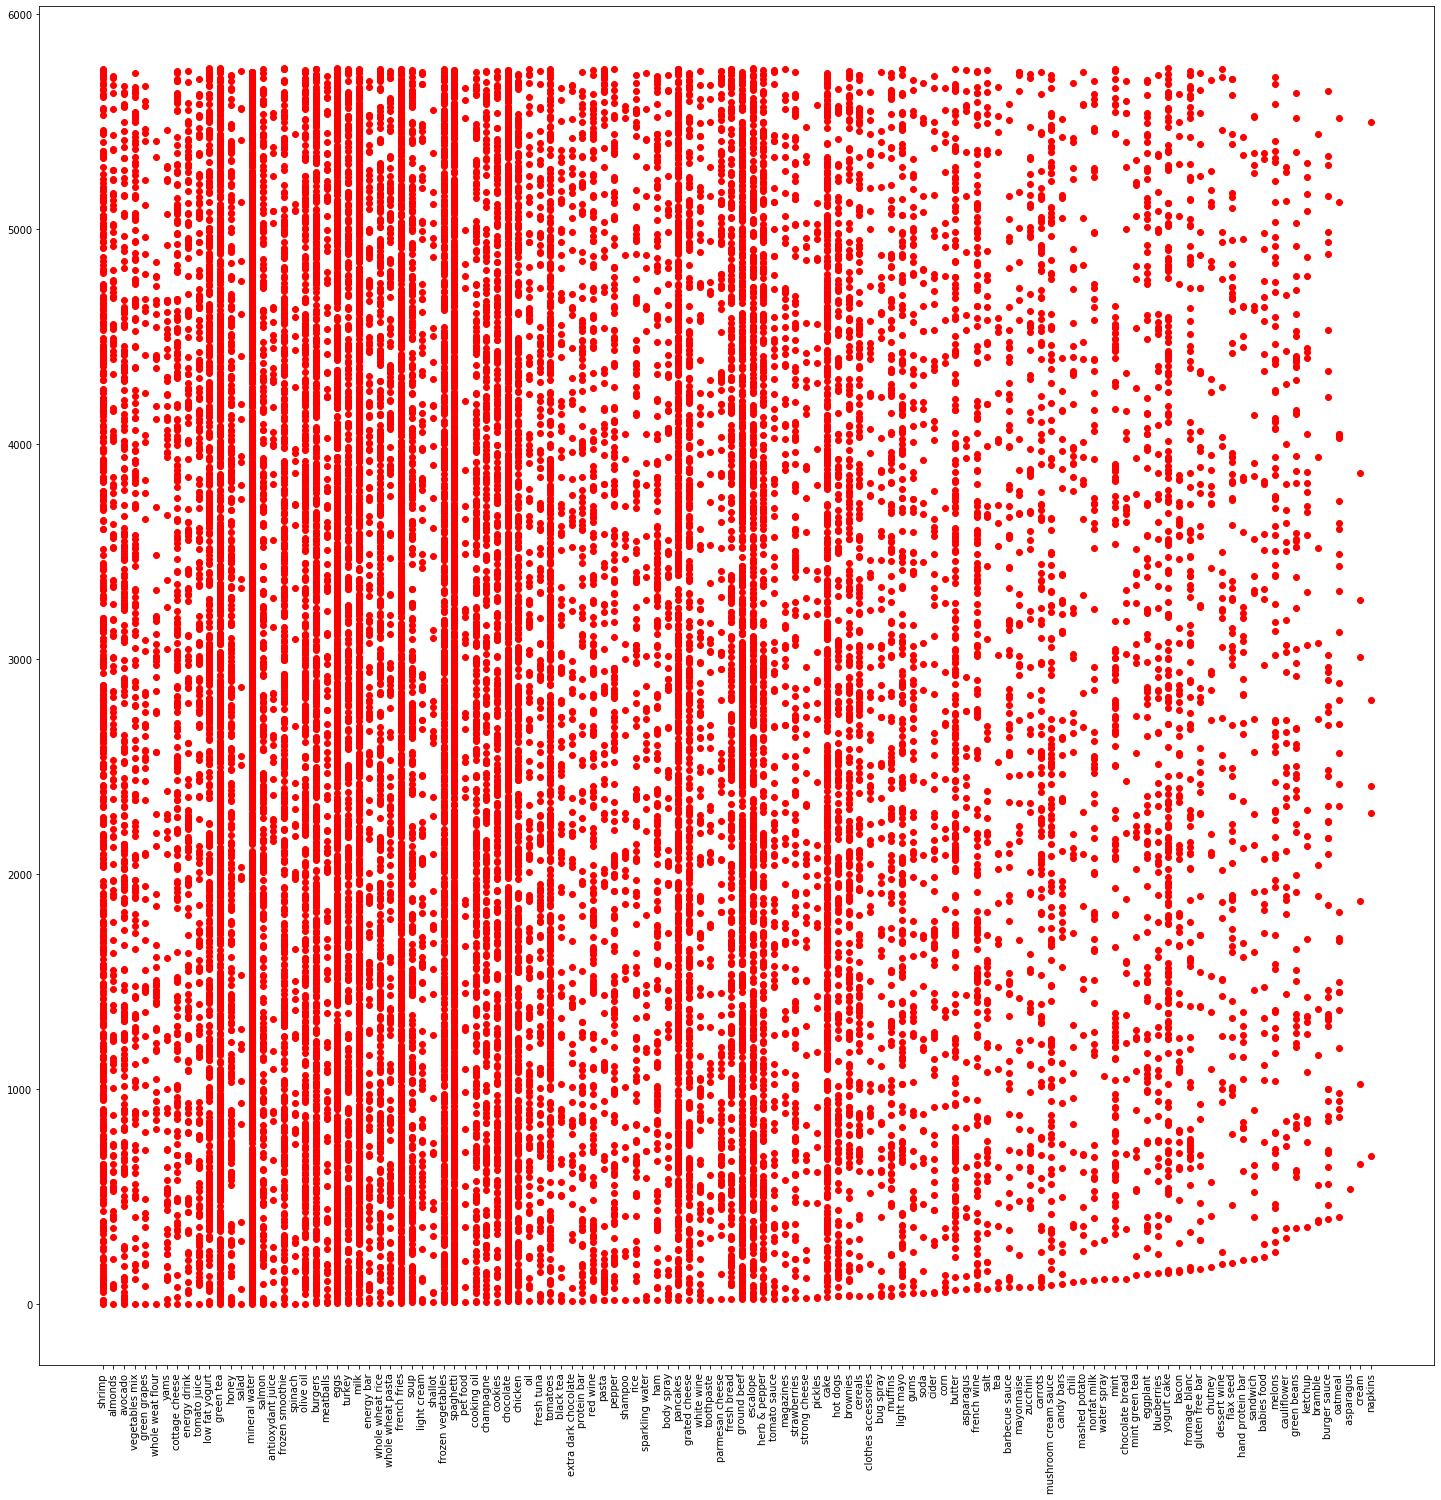

In [25]:
fig=plt.figure(figsize=(25,25))
plt.scatter(all_data,costumers,color='red')
plt.xticks(rotation=90)

We can say from the previous plot that, in most cases, shrimp, green tea, mineral water, burgers, eggs, milk, french fries, frozen vegetables, spaghetti, chocolate, panckakes, ground beef, escalope and cakes are bought together.

In [26]:
new_te_ary=te.fit(new_dataset).transform(new_dataset)
new_data=pd.DataFrame(new_te_ary,columns=te.columns_)
new_data.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


# Apriori

In [35]:
new_apriori_results=apriori(new_data,min_support=0.05,use_colnames=True)
apriori(new_data,min_support=0.05,use_colnames=True)

,support,itemsets
0,0.110318,(burgers)
1,0.100748,(cake)
2,0.053245,(champagne)
3,0.076562,(chicken)
4,0.201148,(chocolate)
5,0.066121,(cookies)
6,0.065425,(cooking oil)
7,0.218897,(eggs)
8,0.085958,(escalope)
9,0.200104,(french fries)


In [40]:
association_rules(new_apriori_results, metric="lift", min_threshold=1.2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(mineral water),(ground beef),0.294936,0.124587,0.053419,0.181121,1.453774,0.016674,1.069039
1,(ground beef),(mineral water),0.124587,0.294936,0.053419,0.428771,1.453774,0.016674,1.234292
2,(ground beef),(spaghetti),0.124587,0.218201,0.051157,0.410615,1.881820,0.023972,1.326465
3,(spaghetti),(ground beef),0.218201,0.124587,0.051157,0.234450,1.881820,0.023972,1.143509
4,(mineral water),(milk),0.294936,0.163390,0.062641,0.212389,1.299895,0.014452,1.062213
5,(milk),(mineral water),0.163390,0.294936,0.062641,0.383387,1.299895,0.014452,1.143445
6,(mineral water),(spaghetti),0.294936,0.218201,0.077954,0.264307,1.211301,0.013598,1.062670
7,(spaghetti),(mineral water),0.218201,0.294936,0.077954,0.357257,1.211301,0.013598,1.096960
